In [1]:
!git clone https://github.com/Fung-Lab/ActiveStructOpt.git

Cloning into 'ActiveStructOpt'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 235 (delta 128), reused 148 (delta 52), pack-reused 0
Receiving objects: 100% (235/235), 23.80 KiB | 7.93 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [2]:
%cd ActiveStructOpt
!pip install -r requirements.txt --quiet
!pip install -e . --quiet

/content/ActiveStructOpt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import activestructopt.dataset.materialsproject
import activestructopt.dataset.rdf
import activestructopt.rmc.rmc
import activestructopt.mcmc.mcmc
from pymatgen.core.composition import Composition
import numpy as np
import matplotlib.pyplot as plt

In [4]:
target_structure = activestructopt.dataset.materialsproject.get_structure('mp-22526', 'YOUR_API_KEY_HERE')

In [21]:
starting_structure = target_structure.copy()
starting_structure.perturb(0.5)

In [6]:
rs = np.arange(0.001, 12.0, 0.001)
exp = activestructopt.dataset.rdf.get_rdf(target_structure, σ = 0.1)

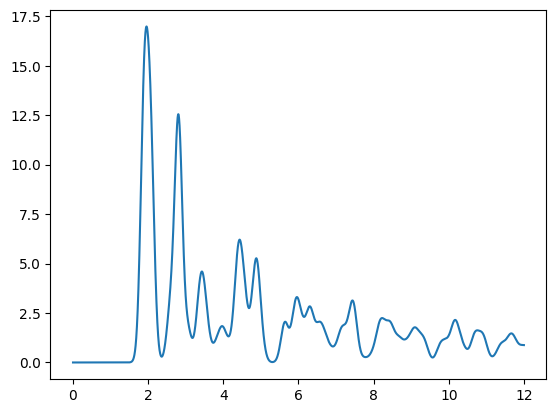

In [7]:
plt.plot(rs, exp)

In [33]:
structures, 𝛘2s, accepts = activestructopt.rmc.rmc.rmc(
  activestructopt.dataset.rdf.get_rdf,
  {'σ': 0.05},
  exp,
  0.5,
  starting_structure,
  5000,
  latticeprob = 0.,
  σr = 0.1,
)

In [34]:
sum(accepts)

1565

Text(0, 0.5, 'Radial Distribution Function')

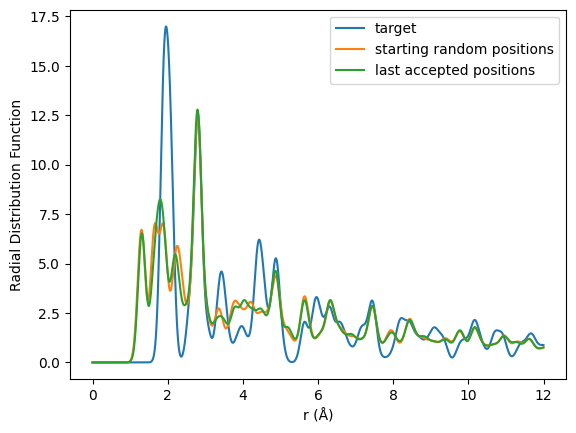

In [42]:
plt.plot(rs, exp, label = "target")
plt.plot(rs, activestructopt.dataset.rdf.get_rdf(structures[0], σ = 0.1), label = "starting random positions")
plt.plot(rs, activestructopt.dataset.rdf.get_rdf(structures[np.nonzero(accepts)[-1][-1]], σ = 0.1), label = "last accepted positions")
plt.legend()
plt.xlabel('r (Å)')
plt.ylabel('Radial Distribution Function')

Text(0, 0.5, 'X2')

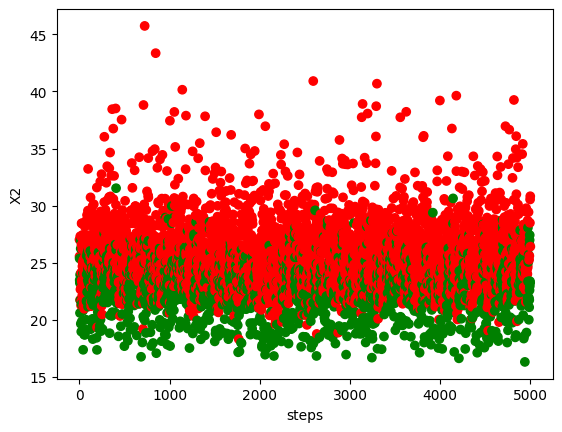

In [45]:
plt.scatter(range(len(𝛘2s)), 𝛘2s, color = ['g' if a else 'r' for a in accepts])
plt.xlabel('steps')
plt.ylabel('X2')